<a href="https://colab.research.google.com/github/manuelJR03/Colab/blob/main/ReventaDeAuto.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd

dataset = pd.read_csv('/content/car_resale_prices.csv')
dataset.head()




,Unnamed: 0,full_name,resale_price,registered_year,engine_capacity,insurance,transmission_type,kms_driven,owner_type,fuel_type,max_power,seats,mileage,body_type,city
0,0,2017 Maruti Baleno 1.2 Alpha,₹ 5.45 Lakh,2017,1197 cc,Third Party insurance,Manual,"40,000 Kms",First Owner,Petrol,83.1bhp,5.0,21.4 kmpl,Hatchback,Agra
1,1,2018 Tata Hexa XTA,₹ 10 Lakh,2018,2179 cc,Third Party insurance,Automatic,"70,000 Kms",First Owner,Diesel,153.86bhp,7.0,17.6 kmpl,MUV,Agra
2,2,2015 Maruti Swift Dzire VXI,₹ 4.50 Lakh,2015,1197 cc,Third Party insurance,Manual,"70,000 Kms",Second Owner,Petrol,83.14bhp,5.0,20.85 kmpl,Sedan,Agra
3,3,2015 Maruti Swift Dzire VXI,₹ 4.50 Lakh,2015,1197 cc,Third Party insurance,Manual,"70,000 Kms",Second Owner,Petrol,83.14bhp,5.0,20.85 kmpl,Sedan,Agra
4,4,2009 Hyundai i10 Magna 1.1,₹ 1.60 Lakh,2009,1086 cc,Third Party insurance,Manual,"80,000 Kms",First Owner,Petrol,68.05bhp,5.0,19.81 kmpl,Hatchback,Agra


In [ ]:
dataset.shape

(17446, 15)

In [ ]:
dataset.isnull().sum()

Unnamed: 0             0
full_name              0
resale_price           0
registered_year       69
engine_capacity       14
insurance              7
transmission_type      0
kms_driven             3
owner_type            45
fuel_type              0
max_power            102
seats                 10
mileage              508
body_type              0
city                   0
dtype: int64

In [ ]:
dataset['registered_year'] = dataset['full_name'].apply(lambda x: x.split(' ')[0]).astype(float)
dataset['registered_year'].isnull().sum()

0

In [ ]:
dataset.dropna(inplace = True)
dataset.isnull().sum()

Unnamed: 0           0
full_name            0
resale_price         0
registered_year      0
engine_capacity      0
insurance            0
transmission_type    0
kms_driven           0
owner_type           0
fuel_type            0
max_power            0
seats                0
mileage              0
body_type            0
city                 0
dtype: int64

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16808 entries, 0 to 17445
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         16808 non-null  int64  
 1   full_name          16808 non-null  object 
 2   resale_price       16808 non-null  object 
 3   registered_year    16808 non-null  float64
 4   engine_capacity    16808 non-null  object 
 5   insurance          16808 non-null  object 
 6   transmission_type  16808 non-null  object 
 7   kms_driven         16808 non-null  object 
 8   owner_type         16808 non-null  object 
 9   fuel_type          16808 non-null  object 
 10  max_power          16808 non-null  object 
 11  seats              16808 non-null  float64
 12  mileage            16808 non-null  object 
 13  body_type          16808 non-null  object 
 14  city               16808 non-null  object 
dtypes: float64(2), int64(1), object(12)
memory usage: 2.1+ MB


In [ ]:
dataset.head()

,Unnamed: 0,full_name,resale_price,registered_year,engine_capacity,insurance,transmission_type,kms_driven,owner_type,fuel_type,max_power,seats,mileage,body_type,city
0,0,2017 Maruti Baleno 1.2 Alpha,₹ 5.45 Lakh,2017.0,1197 cc,Third Party insurance,Manual,"40,000 Kms",First Owner,Petrol,83.1bhp,5.0,21.4 kmpl,Hatchback,Agra
1,1,2018 Tata Hexa XTA,₹ 10 Lakh,2018.0,2179 cc,Third Party insurance,Automatic,"70,000 Kms",First Owner,Diesel,153.86bhp,7.0,17.6 kmpl,MUV,Agra
2,2,2015 Maruti Swift Dzire VXI,₹ 4.50 Lakh,2015.0,1197 cc,Third Party insurance,Manual,"70,000 Kms",Second Owner,Petrol,83.14bhp,5.0,20.85 kmpl,Sedan,Agra
3,3,2015 Maruti Swift Dzire VXI,₹ 4.50 Lakh,2015.0,1197 cc,Third Party insurance,Manual,"70,000 Kms",Second Owner,Petrol,83.14bhp,5.0,20.85 kmpl,Sedan,Agra
4,4,2009 Hyundai i10 Magna 1.1,₹ 1.60 Lakh,2009.0,1086 cc,Third Party insurance,Manual,"80,000 Kms",First Owner,Petrol,68.05bhp,5.0,19.81 kmpl,Hatchback,Agra


Formatear datos numéricos

In [ ]:
num_cols = ['seats', 'registered_year']


Precio numérico

In [ ]:
def format_price(dataset):
    split = dataset.split(' ')
    k = len(split)
    if(k == 2):
        return float(str(split[1]).replace(',', ''))
    elif(split[-1] == 'Lakh'):
        return float(str(split[1]))*100000
    return float(str(split[1]))*10000000

dataset['num_price'] = dataset['resale_price'].apply(format_price)
num_cols.append('num_price')

dataset.head(2)

,Unnamed: 0,full_name,resale_price,registered_year,engine_capacity,insurance,transmission_type,kms_driven,owner_type,fuel_type,max_power,seats,mileage,body_type,city,num_price
0,0,2017 Maruti Baleno 1.2 Alpha,₹ 5.45 Lakh,2017.0,1197 cc,Third Party insurance,Manual,"40,000 Kms",First Owner,Petrol,83.1bhp,5.0,21.4 kmpl,Hatchback,Agra,545000.0
1,1,2018 Tata Hexa XTA,₹ 10 Lakh,2018.0,2179 cc,Third Party insurance,Automatic,"70,000 Kms",First Owner,Diesel,153.86bhp,7.0,17.6 kmpl,MUV,Agra,1000000.0


Kms conducidos

In [ ]:
def format_kms(kms_driven):
    if kms_driven.split(' ')[1] != 'Kms':
        print(kms_driven.split(' ')[1])
    return float(str(kms_driven.split(' ')[0]).replace(',', ''))

dataset['num_kms'] = dataset['kms_driven'].apply(format_kms)
num_cols.append('num_kms')
dataset.head(2)

,Unnamed: 0,full_name,resale_price,registered_year,engine_capacity,insurance,transmission_type,kms_driven,owner_type,fuel_type,max_power,seats,mileage,body_type,city,num_price,num_kms
0,0,2017 Maruti Baleno 1.2 Alpha,₹ 5.45 Lakh,2017.0,1197 cc,Third Party insurance,Manual,"40,000 Kms",First Owner,Petrol,83.1bhp,5.0,21.4 kmpl,Hatchback,Agra,545000.0,40000.0
1,1,2018 Tata Hexa XTA,₹ 10 Lakh,2018.0,2179 cc,Third Party insurance,Automatic,"70,000 Kms",First Owner,Diesel,153.86bhp,7.0,17.6 kmpl,MUV,Agra,1000000.0,70000.0


Capacidad del motor

In [ ]:
def format_engine(engine_capacity):
    if engine_capacity.split(' ')[1] != 'cc':
        print(engine_capacity.split(' ')[1])
    return float(str(engine_capacity.split(' ')[0]))

dataset['num_engine'] = dataset['engine_capacity'].apply(format_engine)
num_cols.append('num_engine')
dataset.head(2)

,Unnamed: 0,full_name,resale_price,registered_year,engine_capacity,insurance,transmission_type,kms_driven,owner_type,fuel_type,max_power,seats,mileage,body_type,city,num_price,num_kms,num_engine
0,0,2017 Maruti Baleno 1.2 Alpha,₹ 5.45 Lakh,2017.0,1197 cc,Third Party insurance,Manual,"40,000 Kms",First Owner,Petrol,83.1bhp,5.0,21.4 kmpl,Hatchback,Agra,545000.0,40000.0,1197.0
1,1,2018 Tata Hexa XTA,₹ 10 Lakh,2018.0,2179 cc,Third Party insurance,Automatic,"70,000 Kms",First Owner,Diesel,153.86bhp,7.0,17.6 kmpl,MUV,Agra,1000000.0,70000.0,2179.0


Máximo poder

In [ ]:
#comprobar si existe una unidad distinta a bhp

dataset['max_power'].apply(lambda x: x[-3:]).value_counts()

bhp    16131
rpm      253
 PS       78
102       31
78        23
       ...  
6.7        1
5.2        1
47         1
9PS        1
4.9        1
Name: max_power, Length: 73, dtype: int64

¡Suelte filas con unidad! = bhp

In [ ]:
dataset = dataset.drop(dataset[dataset['max_power'].apply(lambda x: x[-3:]).str.lower() != 'bhp'].index)

In [ ]:
#convertir a flotante

dataset['max_power'] = dataset['max_power'].apply(lambda x : x[:-3]).astype(float)

num_cols.append('max_power')

dataset.head(2)

,Unnamed: 0,full_name,resale_price,registered_year,engine_capacity,insurance,transmission_type,kms_driven,owner_type,fuel_type,max_power,seats,mileage,body_type,city,num_price,num_kms,num_engine
0,0,2017 Maruti Baleno 1.2 Alpha,₹ 5.45 Lakh,2017.0,1197 cc,Third Party insurance,Manual,"40,000 Kms",First Owner,Petrol,83.10,5.0,21.4 kmpl,Hatchback,Agra,545000.0,40000.0,1197.0
1,1,2018 Tata Hexa XTA,₹ 10 Lakh,2018.0,2179 cc,Third Party insurance,Automatic,"70,000 Kms",First Owner,Diesel,153.86,7.0,17.6 kmpl,MUV,Agra,1000000.0,70000.0,2179.0


Kilometraje

In [ ]:
dataset['mileage'].apply(lambda x: x.split(' ')[-1]).value_counts()

kmpl     15993
km/kg      151
Name: mileage, dtype: int64

Eliminar filas donde la unidad no sea kmpl

In [ ]:
dataset.drop(dataset[dataset['mileage'].apply(lambda x: x.split(' ')[-1]).str.lower() != 'kmpl'].index, inplace = True)

In [ ]:
dataset['mileage'].apply(lambda x: x.split(' ')[-1]).value_counts()

kmpl    15993
Name: mileage, dtype: int64

In [ ]:
dataset['mileage'] = dataset['mileage'].apply(lambda x: x.split(' ')[0]).astype(float)

num_cols.append('mileage')

dataset.head(2)

,Unnamed: 0,full_name,resale_price,registered_year,engine_capacity,insurance,transmission_type,kms_driven,owner_type,fuel_type,max_power,seats,mileage,body_type,city,num_price,num_kms,num_engine
0,0,2017 Maruti Baleno 1.2 Alpha,₹ 5.45 Lakh,2017.0,1197 cc,Third Party insurance,Manual,"40,000 Kms",First Owner,Petrol,83.10,5.0,21.4,Hatchback,Agra,545000.0,40000.0,1197.0
1,1,2018 Tata Hexa XTA,₹ 10 Lakh,2018.0,2179 cc,Third Party insurance,Automatic,"70,000 Kms",First Owner,Diesel,153.86,7.0,17.6,MUV,Agra,1000000.0,70000.0,2179.0



Limpieza numérica completada

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15993 entries, 0 to 17445
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         15993 non-null  int64  
 1   full_name          15993 non-null  object 
 2   resale_price       15993 non-null  object 
 3   registered_year    15993 non-null  float64
 4   engine_capacity    15993 non-null  object 
 5   insurance          15993 non-null  object 
 6   transmission_type  15993 non-null  object 
 7   kms_driven         15993 non-null  object 
 8   owner_type         15993 non-null  object 
 9   fuel_type          15993 non-null  object 
 10  max_power          15993 non-null  float64
 11  seats              15993 non-null  float64
 12  mileage            15993 non-null  float64
 13  body_type          15993 non-null  object 
 14  city               15993 non-null  object 
 15  num_price          15993 non-null  float64
 16  num_kms            159

In [ ]:
num_cols

['seats',
 'registered_year',
 'num_price',
 'num_kms',
 'num_engine',
 'max_power',
 'max_power',
 'mileage']

In [ ]:
num_encoded = dataset[num_cols].copy()
num_encoded.head()

,seats,registered_year,num_price,num_kms,num_engine,max_power,max_power,mileage
0,5.0,2017.0,545000.0,40000.0,1197.0,83.10,83.10,21.40
1,7.0,2018.0,1000000.0,70000.0,2179.0,153.86,153.86,17.60
2,5.0,2015.0,450000.0,70000.0,1197.0,83.14,83.14,20.85
3,5.0,2015.0,450000.0,70000.0,1197.0,83.14,83.14,20.85
4,5.0,2009.0,160000.0,80000.0,1086.0,68.05,68.05,19.81


Codificación categórica

In [ ]:
dataset.head(2)

,Unnamed: 0,full_name,resale_price,registered_year,engine_capacity,insurance,transmission_type,kms_driven,owner_type,fuel_type,max_power,seats,mileage,body_type,city,num_price,num_kms,num_engine
0,0,2017 Maruti Baleno 1.2 Alpha,₹ 5.45 Lakh,2017.0,1197 cc,Third Party insurance,Manual,"40,000 Kms",First Owner,Petrol,83.10,5.0,21.4,Hatchback,Agra,545000.0,40000.0,1197.0
1,1,2018 Tata Hexa XTA,₹ 10 Lakh,2018.0,2179 cc,Third Party insurance,Automatic,"70,000 Kms",First Owner,Diesel,153.86,7.0,17.6,MUV,Agra,1000000.0,70000.0,2179.0


Ciudad

In [ ]:
dataset['city'].value_counts()

Delhi         2783
Bangalore     2166
Mumbai        1893
Hyderabad     1456
Pune          1245
Chennai       1244
Ahmedabad     1229
Kolkata       1089
Gurgaon        978
Jaipur         821
Lucknow        512
Chandigarh     401
Agra           176
Name: city, dtype: int64

Tipo de cuerpo

In [ ]:
dataset = dataset.groupby('body_type').filter(lambda x: len(x) > 45)
dataset['body_type'].value_counts()

Hatchback    6869
Sedan        4380
SUV          3968
MUV           671
Minivans       46
Name: body_type, dtype: int64

Tipo de combustible

In [ ]:
dataset['fuel_type'].value_counts()

Petrol      10544
Diesel       5060
CNG           307
LPG            19
Electric        4
Name: fuel_type, dtype: int64

Tipo de propietario

In [ ]:
dataset['owner_type'].value_counts()

First Owner     11384
Second Owner     3758
Third Owner       667
Fourth Owner       95
Fifth Owner        30
Name: owner_type, dtype: int64

Tipo de transmisión

In [ ]:
dataset['transmission_type'].value_counts()

Manual       11466
Automatic     4468
Name: transmission_type, dtype: int64

Seguro

In [ ]:
dataset['insurance'].value_counts()

Third Party insurance    6722
Comprehensive            5968
Third Party              1870
Zero Dep                  797
Not Available             569
1                           5
2                           3
Name: insurance, dtype: int64

In [ ]:
dataset = dataset.groupby('insurance').filter(lambda x: len(x) > 500)
dataset['insurance'].value_counts()

Third Party insurance    6722
Comprehensive            5968
Third Party              1870
Zero Dep                  797
Not Available             569
Name: insurance, dtype: int64

Una codificación en caliente

In [ ]:
categorical_columns = ['city', 'body_type', 'fuel_type', 'owner_type', 'insurance', 'transmission_type']

In [ ]:
from sklearn.preprocessing import OneHotEncoder

cat_encoded = pd.get_dummies(dataset[categorical_columns])
cat_encoded.head()

,city_Agra,city_Ahmedabad,city_Bangalore,city_Chandigarh,city_Chennai,city_Delhi,city_Gurgaon,city_Hyderabad,city_Jaipur,city_Kolkata,...,owner_type_Fourth Owner,owner_type_Second Owner,owner_type_Third Owner,insurance_Comprehensive,insurance_Not Available,insurance_Third Party,insurance_Third Party insurance,insurance_Zero Dep,transmission_type_Automatic,transmission_type_Manual
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
2,1,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,1
3,1,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,1
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1


Nombre de la empresa y nombre del modelo

In [ ]:
dataset['model'] = dataset['full_name'].apply(lambda x: x.split(' ')[1] + " " + x.split(' ')[2])

dataset['model'].nunique()

223

In [ ]:
model_encoded = pd.get_dummies(dataset['model'])

In [ ]:
model_encoded.head()

,Audi A3,Audi A4,Audi A6,Audi A8,Audi Q3,Audi Q5,Audi Q7,Audi S5,BMW 1,BMW 2,...,Volkswagen Tiguan,Volkswagen Touareg,Volkswagen Vento,Volkswagen Virtus,Volvo S60,Volvo S90,Volvo V40,Volvo XC,Volvo XC40,Volvo XC60
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Fusionando todos los datos

In [ ]:
df = pd.concat([dataset[num_encoded.columns], cat_encoded, model_encoded], axis = 1)
df.head()

,seats,registered_year,num_price,num_kms,num_engine,max_power,max_power,mileage,city_Agra,city_Ahmedabad,...,Volkswagen Tiguan,Volkswagen Touareg,Volkswagen Vento,Volkswagen Virtus,Volvo S60,Volvo S90,Volvo V40,Volvo XC,Volvo XC40,Volvo XC60
0,5.0,2017.0,545000.0,40000.0,1197.0,83.10,83.10,21.40,1,0,...,0,0,0,0,0,0,0,0,0,0
1,7.0,2018.0,1000000.0,70000.0,2179.0,153.86,153.86,17.60,1,0,...,0,0,0,0,0,0,0,0,0,0
2,5.0,2015.0,450000.0,70000.0,1197.0,83.14,83.14,20.85,1,0,...,0,0,0,0,0,0,0,0,0,0
3,5.0,2015.0,450000.0,70000.0,1197.0,83.14,83.14,20.85,1,0,...,0,0,0,0,0,0,0,0,0,0
4,5.0,2009.0,160000.0,80000.0,1086.0,68.05,68.05,19.81,1,0,...,0,0,0,0,0,0,0,0,0,0


EDA

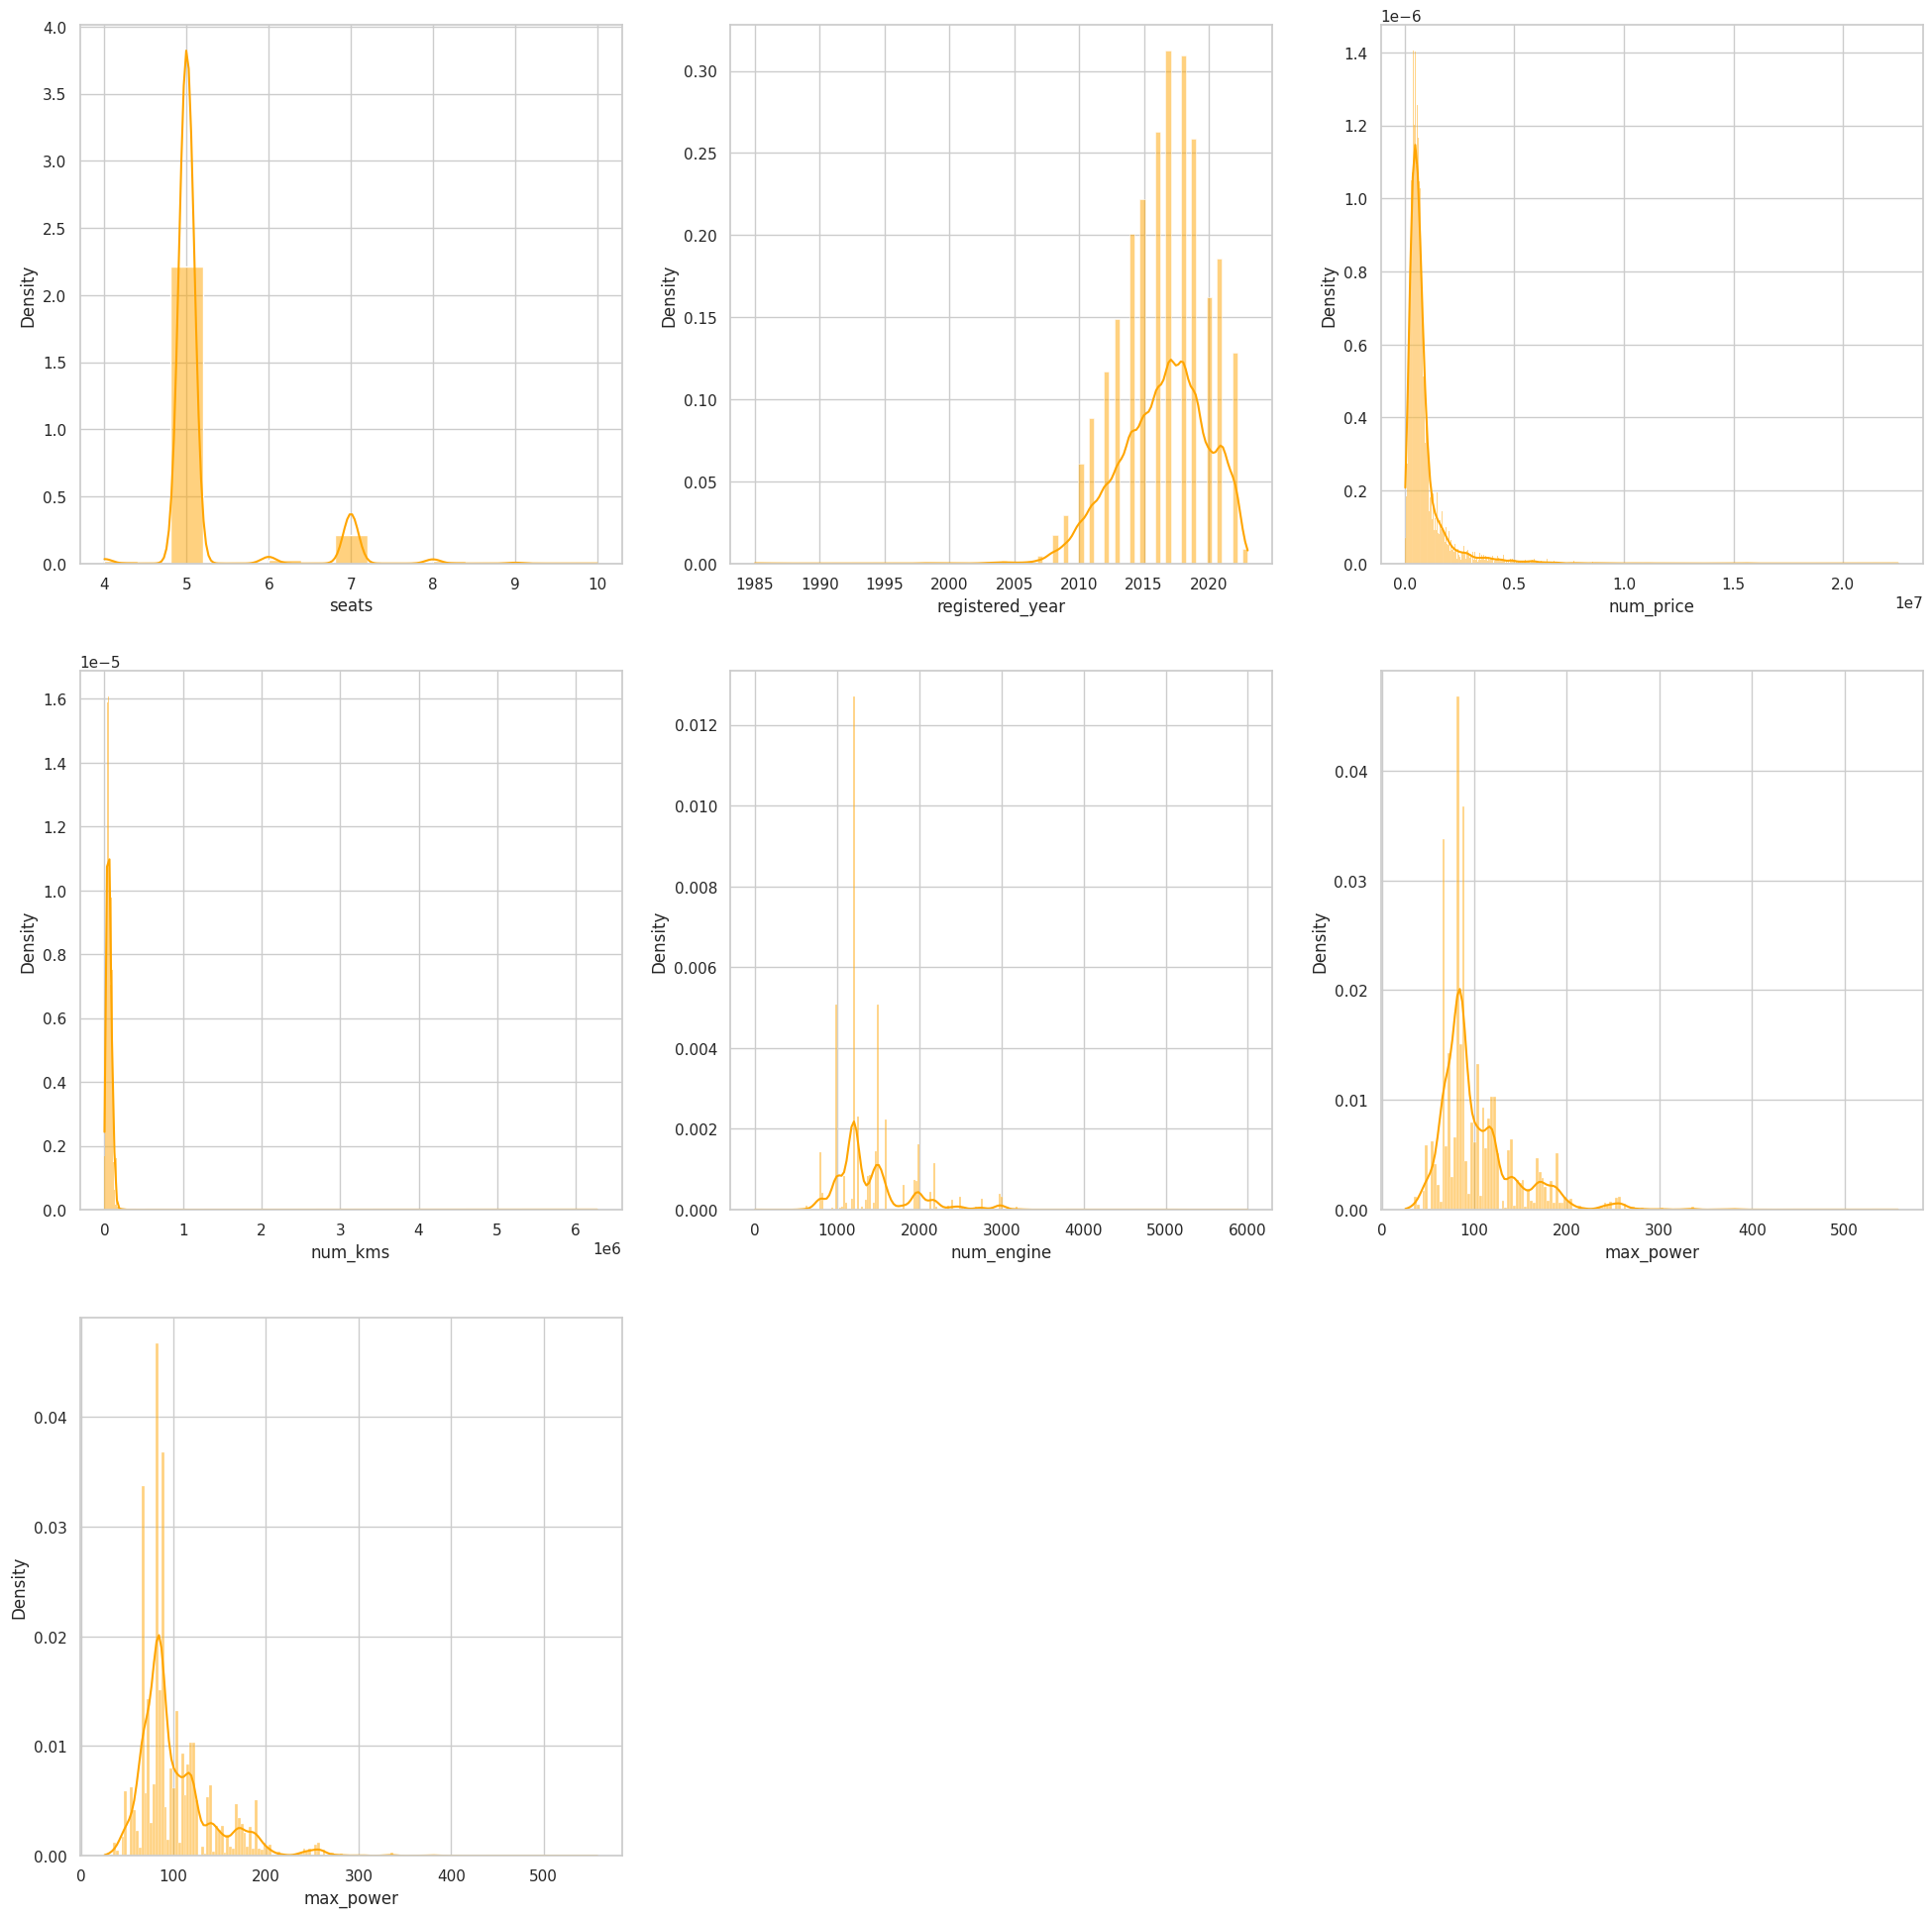

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, ax1 = plt.subplots(3,3, figsize=(24,24))
k = 0
columns = list(num_encoded.columns)
for i in range(3):
    for j in range(3):
            sns.histplot(dataset[columns[k]], ax = ax1[i][j], color = 'orange', kde=True, stat="density")
            k += 1
            if k > 6:
                break
    if k > 6:
                break
fig.delaxes(ax1[2,2]) # La indexación aquí es de base cero.
fig.delaxes(ax1[2,1])
plt.show()

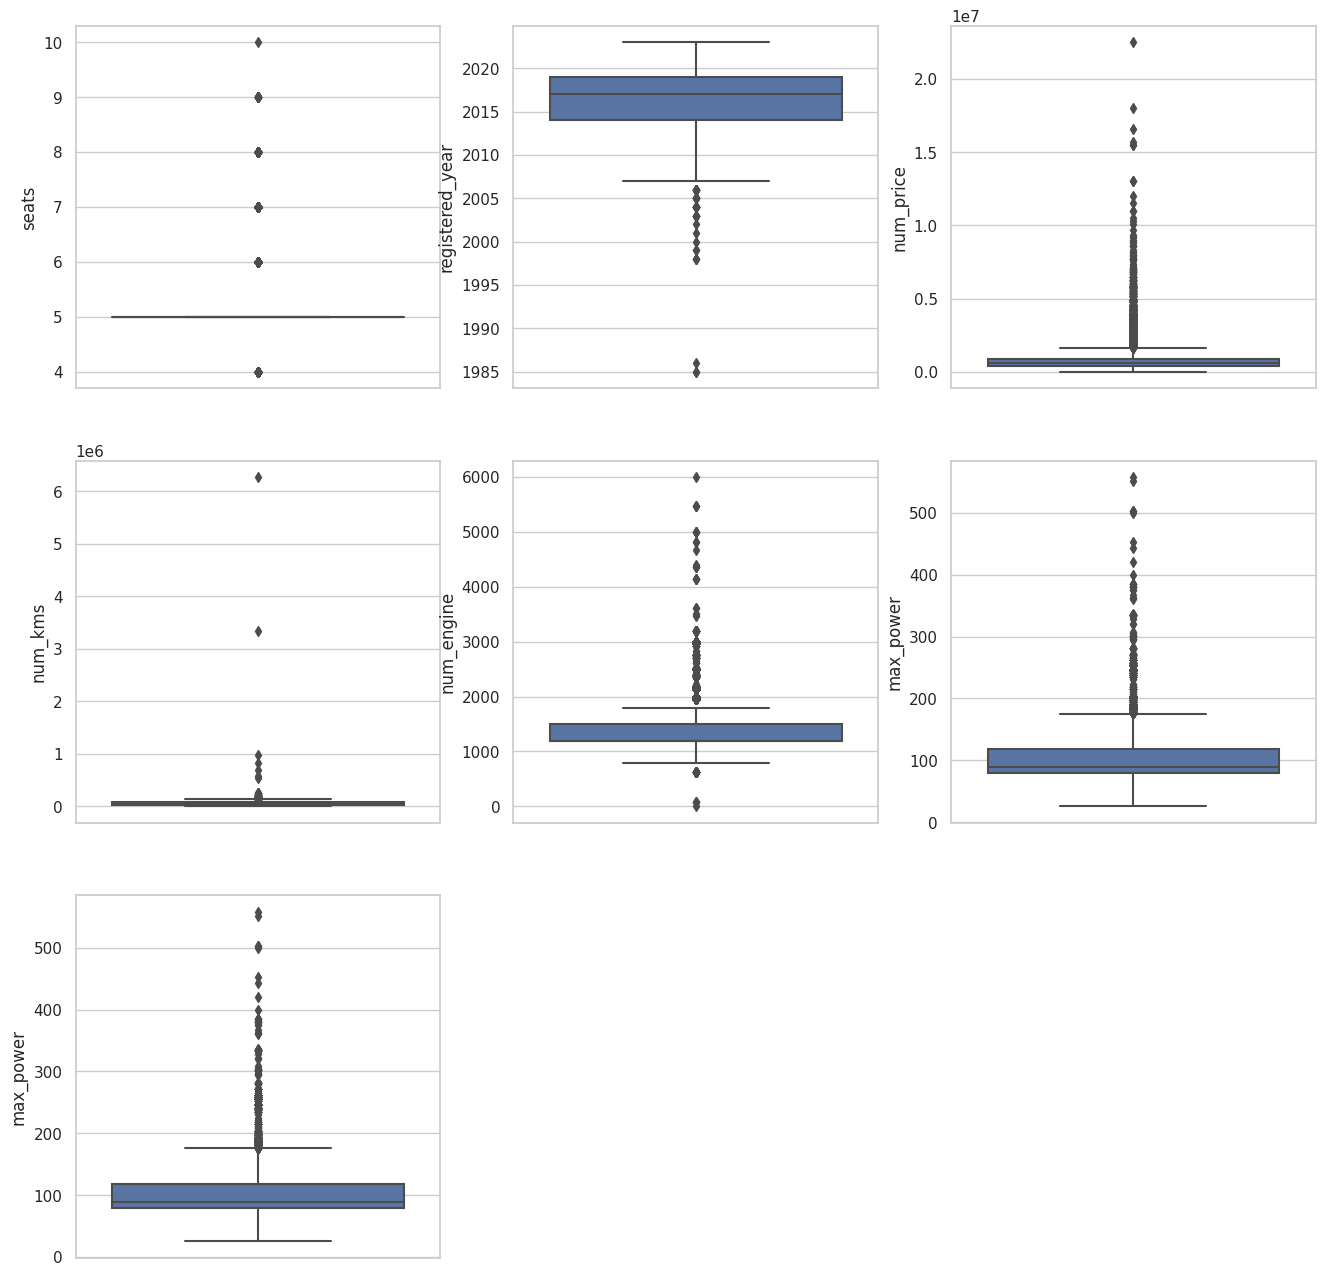

In [ ]:
sns.set(style="whitegrid")
fig, ax1 = plt.subplots(3,3, figsize=(16,16))
col = 0
for i in range(3):
    for j in range(3):
            sns.boxplot( y=dataset[columns[col]], ax = ax1[i][j], orient='v')
            col += 1
            if col > 6:
                break
    if col > 6:
                break

fig.delaxes(ax1[2,2]) # The indexing is zero-based here
fig.delaxes(ax1[2,1])
plt.show()

In [ ]:
skewed_cols = ['seats', 'num_kms', 'num_engine', 'max_power', 'mileage']

for col in skewed_cols:
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1
    outliers = df.loc[(df[col] < q1 - 1.5*iqr) | (df[col] > q3 + 1.5*iqr)]
    df = df.drop(outliers.index)

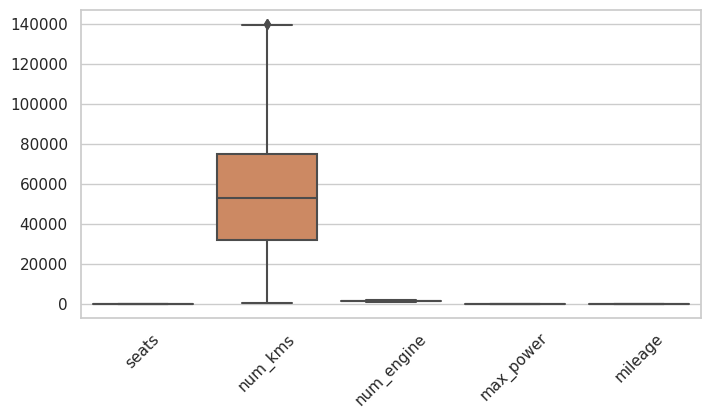

In [ ]:
fig = plt.figure(figsize = (8,4))
plt.xticks(rotation = 45)
sns.set(style="whitegrid")
sns.boxplot(data=df[skewed_cols])
plt.show()

In [ ]:
dataset[num_encoded.columns].corr()['num_price'].sort_values(ascending = False)

num_price          1.000000
max_power          0.758533
max_power          0.758533
num_engine         0.610993
registered_year    0.321222
seats              0.163327
num_kms           -0.048971
mileage           -0.338011
Name: num_price, dtype: float64

MODELADO DE AA

In [ ]:
df.head()

,Unnamed: 0,full_name,resale_price,registered_year,engine_capacity,insurance,transmission_type,kms_driven,owner_type,fuel_type,max_power,seats,mileage,body_type,city,num_price,num_kms,num_engine,model
0,0,2017 Maruti Baleno 1.2 Alpha,₹ 5.45 Lakh,2017.0,1197 cc,Third Party insurance,Manual,"40,000 Kms",First Owner,Petrol,83.10,5.0,21.40,Hatchback,Agra,545000.0,40000.0,1197.0,Maruti Baleno
2,2,2015 Maruti Swift Dzire VXI,₹ 4.50 Lakh,2015.0,1197 cc,Third Party insurance,Manual,"70,000 Kms",Second Owner,Petrol,83.14,5.0,20.85,Sedan,Agra,450000.0,70000.0,1197.0,Maruti Swift
3,3,2015 Maruti Swift Dzire VXI,₹ 4.50 Lakh,2015.0,1197 cc,Third Party insurance,Manual,"70,000 Kms",Second Owner,Petrol,83.14,5.0,20.85,Sedan,Agra,450000.0,70000.0,1197.0,Maruti Swift
4,4,2009 Hyundai i10 Magna 1.1,₹ 1.60 Lakh,2009.0,1086 cc,Third Party insurance,Manual,"80,000 Kms",First Owner,Petrol,68.05,5.0,19.81,Hatchback,Agra,160000.0,80000.0,1086.0,Hyundai i10
5,5,2015 Hyundai i20 Active 1.2,₹ 4.70 Lakh,2015.0,1197 cc,Third Party insurance,Manual,"70,000 Kms",First Owner,Petrol,81.86,5.0,17.19,Hatchback,Agra,470000.0,70000.0,1197.0,Hyundai i20


In [ ]:
scalable_cols = num_cols.remove('num_price')

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
y = df['num_price']
X = df.drop('num_price', axis = 1)

X.shape

(11520, 18)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("X_train : " + str(X_train.shape))
print("X_test : " + str(X_test.shape))

X_train : (9216, 18)
X_test : (2304, 18)


In [ ]:
#from sklearn.linear_model import LinearRegression
#lin_reg = LinearRegression()
#lin_reg.fit(X_train, y_train)